In [1]:
from maze import MazeGenerator
from path_generator import PathGenerator
from genetic_algorithm import GeneticAlgorithm
from maze_drawer import matrix_to_image
from gen_functions import fitness, mutation, crossover
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCHS = 1000
POPULATION = 50
MUTATION_RATE = 0.1
DIM = 21

In [3]:
maze_gen = MazeGenerator(DIM, DIM)
maze_dic = maze_gen.get_matrix_dic("mazes/my_dict.pkl")

# Cargar la data del laberinto desde el archivo
maze_matrix = maze_dic["matrix"]
entry_position = maze_dic["entry"]
exit_position = maze_dic["exit"]
checkpoints = maze_dic["checkpoints"]

print(f"Features de Maze:")
for key in maze_dic:
    print(f" - {key}: {maze_dic[key]}")
print(f"Meta en celda: {maze_dic["exit"]}")

Features de Maze:
 - matrix: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

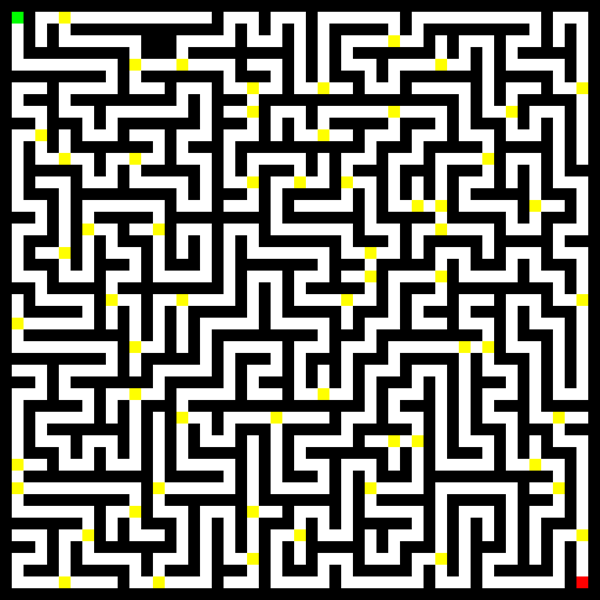

In [4]:
image = matrix_to_image(maze_matrix, entry_position, exit_position, checkpoints=checkpoints)
image_resized = image.resize((600, 600))
display(image_resized)

In [5]:
# Generar una población de caminos inicial
path_gen = PathGenerator(maze_matrix, entry_position)
path_gen.generate_paths(POPULATION)
paths = path_gen.get_paths()

# Aplicar el algoritmo genético para encontrar la solución
genetic = GeneticAlgorithm(paths, maze_dic, MUTATION_RATE, EPOCHS, POPULATION, fitness, crossover, mutation)
generations, fitness_history, solution_found, final_epoch = genetic.run()

if solution_found:
    print(f"\nSOLUTION FOUND!! AT Generation {final_epoch}")
    print(f"Times maze was completed: {maze_dic["solutions"][exit_position]}")

EVOLUTION:  -> 100%|██████████| 1000/1000 genetarions [00:22<00:00]


SOLUTION FOUND!! AT Generation 22
Times maze was completed: 17881


## Rendimiento

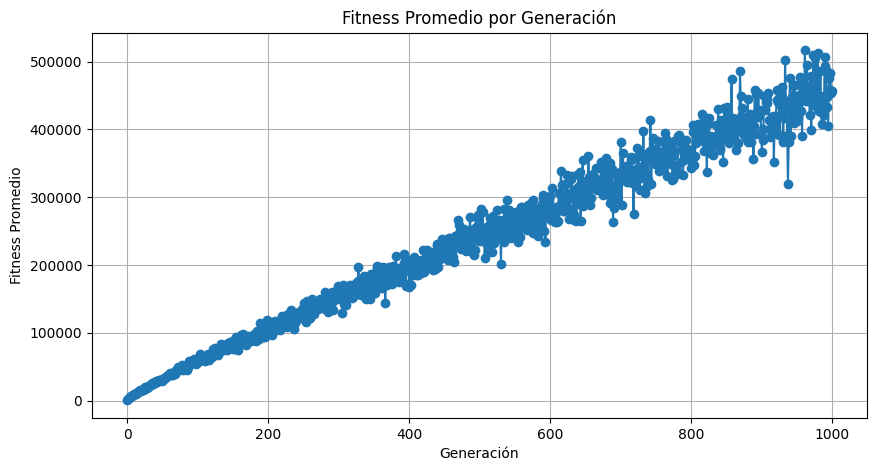

In [6]:
# Gráfico de Fitness Promedio por Generación
avg_fitness_per_generation = [np.mean(fit) for fit in fitness_history]
plt.figure(figsize=(10, 5))
plt.plot(range(len(avg_fitness_per_generation)), avg_fitness_per_generation, marker='o')
plt.title("Fitness Promedio por Generación")
plt.xlabel("Generación")
plt.ylabel("Fitness Promedio")
plt.grid(True)
plt.show()

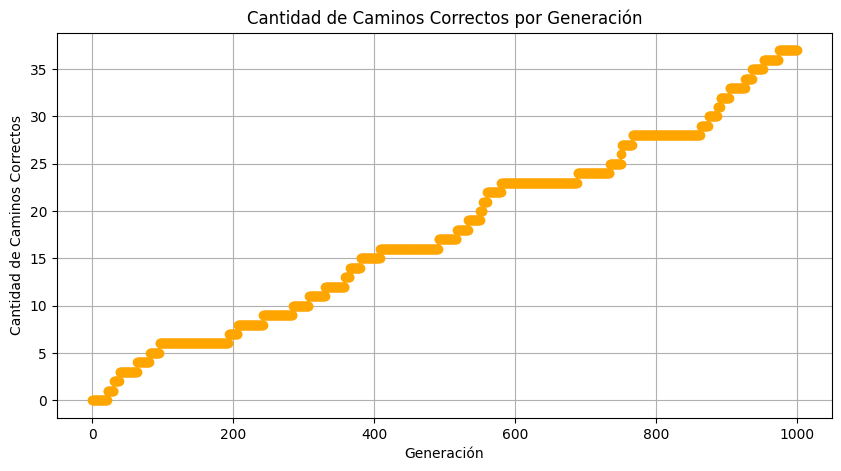

In [7]:
# Gráfico de Cantidad de Caminos Correctos por Generación
correct_paths_per_generation = [
    sum(1 for path in generation if path[-1] == exit_position) for generation in generations
]
plt.figure(figsize=(10, 5))
plt.plot(range(len(correct_paths_per_generation)), correct_paths_per_generation, marker='o', color='orange')
plt.title("Cantidad de Caminos Correctos por Generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de Caminos Correctos")
plt.grid(True)
plt.show()